## Import necessary libraries

In [1]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns #For advanced aesthetically pleasing visuals

# Print a message to confirm the libraries are imported
print("Libraries imported successfully!")

Libraries imported successfully!


## Load dataset and display Table information

In [2]:
df = pd.read_csv(r"C:\Users\durue\python\Customer_churn\Telco-customer-churn.csv")
print(df.shape)
print('#--')
df.info()


(7043, 21)
#--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

## Data Cleaning
### From the data information, we see that there are 20 columns in the dataset. 
**Something looks off when we look at the data type for the 'TotalCharges' column. I suppose that it should be an integer column and not object. In order to verify this, let's have a glimpse of the dataset*

## Display the first 5 rows: 
*In order to get a glimpse of the dataset*

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* As earlier suggested, the correct data type for the 'TotalCharges' column should be float and not object.  

* Something that also stands out to me is the 'SeniorCitizen' column, which has only 0s as values. Is it a column to be removed from the dataset or are there some errors that need to be cleaned?  
*In order to be sure of this, let's see more of the dataset. I would say the first 50 rows.*  
*I would like to find out if the values are consistent through out the columns or if it's a case of wrong data type as with the 'TotalCharges' column.*

## To display the first 50 rows of the dataset

In [4]:
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


* From the dataset above, there are only two values consistent in all 50 rows of the 'SeniorCitizen' column.  
1 and 0 *This suggest a boolean data type which would indicate 'yes' and 'no' to the question of if the customer is a senior citizen or not.*

* We can also confirm the unique values in all rows of the column and count them  

In [5]:
print(df['SeniorCitizen'].unique())
print('#--')
print(df['SeniorCitizen'].value_counts()) 

[0 1]
#--
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


*Steps to take*
* Change the data type of the TotalCharges column to float
* Change the SeniorCitizen to object, while mapping the values 1 and 0 to yes and no respectively

## Changing data types of columns

In [6]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#'SeniorCitizen' column
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

#To verify change on SeniorCitizen column
print(df['SeniorCitizen'].value_counts())
print('#--')
print(df['SeniorCitizen'].unique())

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64
#--
['No' 'Yes']


### To verify data type changes on the columns

In [7]:
print(df.dtypes)
print('#--')
df.head(50)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
#--


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### We will now check for missing values and duplicate rows

In [8]:
print(df.isnull().sum())
print('#--')
print(df.duplicated().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
#--
0


## Data Cleaning Cont'd
There are 11 missing rows in the TotalCharges column. It is important to view these columns in order to properly understand the data

In [9]:
missing_values = df[df['TotalCharges'].isna()]
print(missing_values)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes       0   
3331  7644-OMVMY    Male            No     Yes        Yes       0   
3826  3213-VVOLG    Male            No     Yes        Yes       0   
4380  2520-SGTTA  Female            No     Yes        Yes       0   
5218  2923-ARZLG    Male            No     Yes        Yes       0   
6670  4075-WKNIU  Female            No     Yes        Yes       0   
6754  2775-SEFEE    Male            No      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753      

* For every row where TotalCharges = NaN, tenure is 0; this would imply that the customers have not yet began their tenures on the service with the company or subsription is not yet active.  

* We can now move on from Data Cleaning and go on to summarize basic statistics of the data

# Summarize basic statistics

In [10]:
print(df.describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


# Exploratory Data Analysis of the dataset
Now that the data is clean, let’s explore key insights! We will cover:

✅ Understanding Churn Distribution  
✅ Analyzing Customer Demographics  
✅ Tenure vs. Churn (Retention Patterns)  
✅ Monthly Charges & Total Charges Trends  
✅ Contract Type & Churn Rate

## 1️⃣ Churn Distribution
This is important to find out how many customers have churned vs stayed  
➡️ Insight: If churn is high, we need to find patterns behind it.

7043


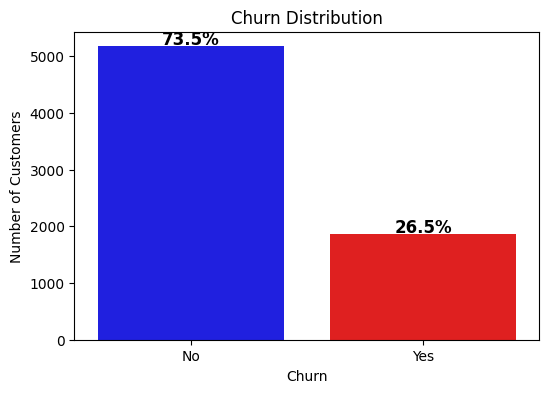

In [11]:
# To count the number of customers in each churn category
churn_counts = df['Churn'].value_counts()
total_customers = len(df)
print(total_customers)

# Create the plot
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, hue='Churn', legend=False, palette={'No': 'blue', 'Yes': 'red'})

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = f"{(p.get_height() / total_customers) * 100:.1f}%"  # Calculate percentage
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 30, percentage, ha='center', fontsize=12, fontweight='bold', color='black')

# Title and labels
plt.title("Churn Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Churn")
plt.show()




## 2️⃣ Customer Demographics (Gender & Senior Citizen Distribution)
➡️ Question: Do more senior citizens churn?

### Gender Distribution

gender
Male      3555
Female    3488
Name: count, dtype: int64
#--
['Female' 'Male']


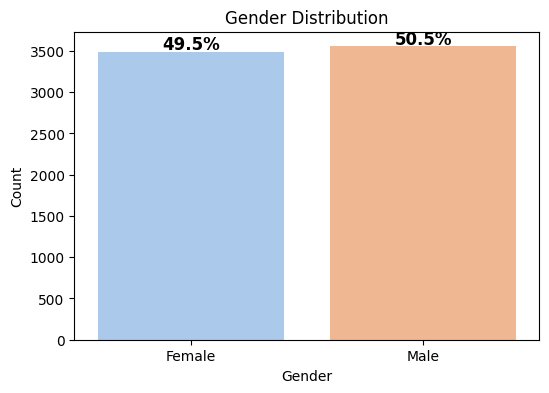

In [12]:
print(df['gender'].value_counts())
print('#--')
print(df['gender'].unique())

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="gender", hue="gender", palette="pastel", legend=False)

# Add percentage labels
total_customers = len(df)
for p in ax.patches:
    percentage = f"{(p.get_height() / total_customers) * 100:.1f}%"  
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 30, percentage, ha='center', fontsize=12, fontweight='bold', color='black')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Senior Citizen Distribution
➡️ Question: Do more senior citizens churn?

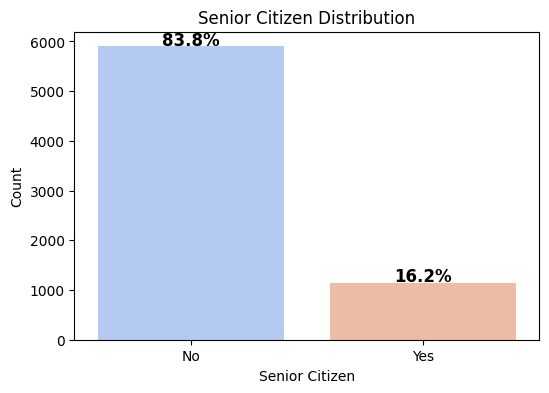

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="SeniorCitizen", hue="SeniorCitizen", palette="coolwarm", legend=False)

# Add percentage labels
for p in ax.patches:
    percentage = f"{(p.get_height() / total_customers) * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 30, percentage, 
            ha='center', fontsize=12, fontweight='bold', color='black')

plt.title("Senior Citizen Distribution")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()


## 3️⃣ Tenure vs. Churn (Retention Patterns)
➡️ Insight: Are new customers churning more?

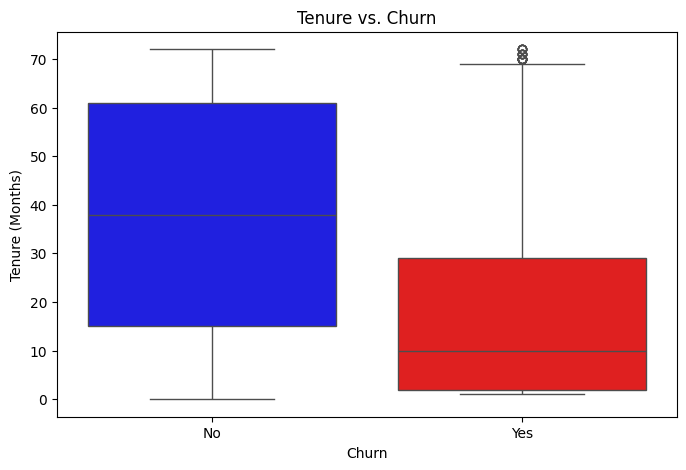

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="Churn", y="tenure", hue="Churn", palette=["blue", "red"], legend=False)

plt.title("Tenure vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()

## 4️⃣ Monthly & Total Charges Distribution
➡️ Question: Do customers with higher charges churn more?

### Monthly Charges Distribution

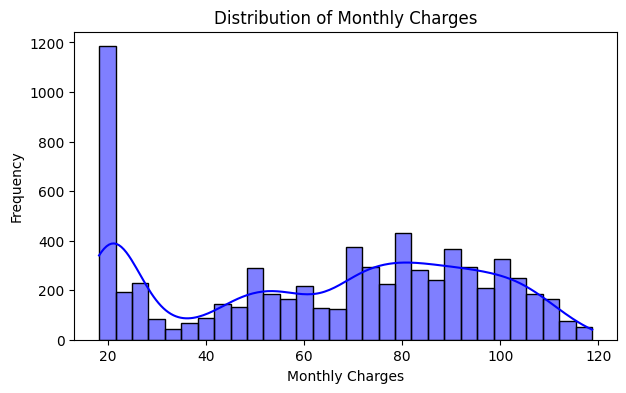

In [15]:
plt.figure(figsize=(7, 4))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color='blue')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


### Total Charges Distribution

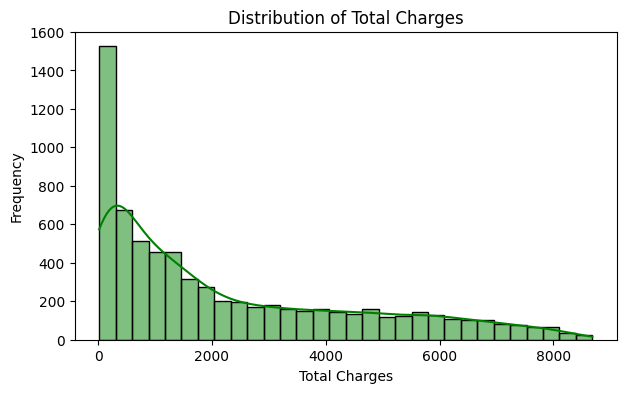

In [16]:
plt.figure(figsize=(7, 4))
sns.histplot(df["TotalCharges"], bins=30, kde=True, color='green')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

## 5️⃣ Contract Type & Churn Rate
➡️ Insight: Customers on month-to-month contracts likely churn more.

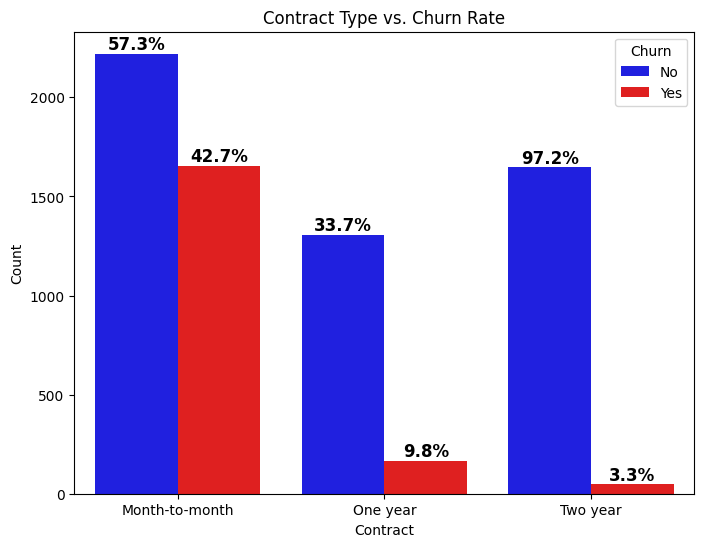

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create a countplot with Churn categorized by Contract type
ax = sns.countplot(data=df, x="Contract", hue="Churn", palette=["blue", "red"])

# Get counts for each contract type
contract_counts = df["Contract"].value_counts()

# Get contract type labels
contract_labels = contract_counts.index.tolist()

# Add percentage labels
for p in ax.patches:
    if p.get_height() > 0:  # Only label bars with values
        contract_label = contract_labels[int(p.get_x())]  # Convert x-position to contract label
        total = contract_counts[contract_label]  # Get total count for that contract type
        percentage = f"{(p.get_height() / total) * 100:.1f}%"  # Corrected the formatting
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at the top of the bar
                    ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Adjust labels and title
plt.xlabel("Contract")
plt.ylabel("Count")
plt.title("Contract Type vs. Churn Rate")
plt.legend(title="Churn")

# Show plot
plt.show()


# 🔍 Refined Insights from EDA
After exploring the Telco Customer Churn dataset, here are the key findings:

### 1️⃣ Churn Distribution
**A significant portion of customers have churned (26.5%).**  
*Understanding the characteristics of these customers is crucial for reducing churn.*
### 2️⃣ Customer Demographics
**Gender:** Churn rates are almost identical between male and female customers, indicating gender is not a strong predictor of churn.  
**Senior Citizens:** *The majority of customers (83.8%) are not senior citizens, while 16.2% are.*  
*This suggests that the company’s customer base consists mainly of younger or middle-aged individuals.**
### 3️⃣ Tenure vs. Churn
**Customers who churned tend to have much shorter tenures, with many leaving within the first 10–15 months.**  
**Those who stayed generally had longer tenures, with the median tenure being significantly higher.**
This indicates that retention strategies should focus on new customers, as they are more likely to leave early.
### 4️⃣ Monthly & Total Charges Distribution
**The monthly distribution is bimodal, with a significant number of customers paying low charges (~$20) and another peak at higher charges ($60–$100).**  
*This suggests the presence of two customer segments:* those on **basic** plans and those on **premium** plans.  
*The first peak could be customers on basic services, while the second peak might represent those with add-ons or bundled services.*  
**The total charges distribution is highly right-skewed, meaning most customers have low total charges, likely due to short tenures.**  
**Long-term customers accumulate higher total charges over time.**  
*The sharp drop-off suggests many customers do not stay long enough to accumulate high total charges.*
### 5️⃣ Contract Type & Churn Rate
**Month-to-month contracts have the highest churn rate (42.7%)**, indicating that customers without long-term commitments are more likely to leave.  
**One-year and two-year contracts have significantly lower churn rates (9.8% and 3.3%, respectively).**  
*This suggests that longer contracts improve retention, likely due to incentives such as discounts or contractual obligations.*

# Key Takeaways for Business Strategy
✅ Focus on Retaining New Customers – Implement loyalty programs or onboarding strategies to prevent early churn.  
✅ Promote Long-Term Contracts – Offer attractive discounts or bundled packages to encourage customers to commit to longer contracts.  
✅ Target High-Churn Segments – Identify at-risk customers (those with short tenures and month-to-month contracts) and engage them with personalized offers.  
✅ Differentiate Pricing & Services – Understanding the peaks in monthly charges can help in designing competitive pricing strategies for different customer segments.  

In [18]:
# Check for missing values
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [19]:
# Fill missing TotalCharges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Confirm no missing values remain
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [20]:
# Identify categorical columns (excluding 'customerID' since it's an identifier)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # Remove customerID from encoding

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows
df_encoded.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,34,56.95,1889.50,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.85,108.15,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,45,42.30,1840.75,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2,70.70,151.65,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [21]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.model_selection import train_test_split

# Drop 'customerID' since it's not useful for modeling
df_encoded.drop(columns=['customerID'], inplace=True)

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 30), (1409, 30), (5634,), (1409,))

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling only to numerical features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Confirm scaling
X_train_scaled.head()


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0.102371,-0.521976,-0.262257,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
3151,-0.711743,0.337478,-0.503635,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4860,-0.793155,-0.809013,-0.749883,True,False,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3867,-0.263980,0.284384,-0.172722,False,False,True,False,True,False,False,...,False,True,False,True,False,True,True,True,False,False
3810,-1.281624,-0.676279,-0.989374,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train (fit) the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Display classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔹 Accuracy: 0.8062
🔹 Precision: 0.6593
🔹 Recall: 0.5588
🔹 F1 Score: 0.6049

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1035
        True       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


🔍 Confusion Matrix:
[[927 108]
 [165 209]]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize Random Forest with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Display results
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


🔹 Accuracy: 0.7921
🔹 Precision: 0.6411
🔹 Recall: 0.4920
🔹 F1 Score: 0.5567

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1035
        True       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


🔍 Confusion Matrix:
[[932 103]
 [190 184]]


In [26]:
pip install xgboost

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [28]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,   # Number of trees (default: 100)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=4,        # Maximum depth of trees
    subsample=0.8,      # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Avoids unnecessary warning messages
)

In [29]:
xgb_model.fit(X_train, y_train)

c:\Users\durue\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
y_pred_xgb = xgb_model.predict(X_test)

In [31]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print Evaluation Metrics
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Classification Report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

🔹 Accuracy: 0.7991
🔹 Precision: 0.6502
🔹 Recall: 0.5267
🔹 F1 Score: 0.5820

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1035
        True       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


🔍 Confusion Matrix:
[[929 106]
 [177 197]]


In [35]:
import os

# Check if file exists
print(os.path.exists("xgb_model.json"))

False


In [36]:
import xgboost as xgb

# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

print("✅ XGBoost model retrained successfully!")

# Save the model for future use
model.save_model("xgb_model.json")  
print("✅ Model saved as 'xgb_model.json'!")

c:\Users\durue\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:50:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost model retrained successfully!
✅ Model saved as 'xgb_model.json'!


In [37]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Adjust threshold (try 0.4 instead of 0.5)
threshold = 0.4
y_pred_new = (y_probs >= threshold).astype(int)

print("✅ Predictions made successfully!")

✅ Predictions made successfully!


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Compute new evaluation metrics
accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test, y_pred_new)

# Print evaluation metrics
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Print classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred_new))

# Print confusion matrix
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_new))

🔹 Accuracy: 0.7771
🔹 Precision: 0.5758
🔹 Recall: 0.6096
🔹 F1 Score: 0.5922

🔍 Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1035
        True       0.58      0.61      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409


🔍 Confusion Matrix:
[[867 168]
 [146 228]]


In [39]:
# Get feature importance scores from XGBoost model
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(importance_df.head(10))

                           Feature  Importance
10     InternetService_Fiber optic    0.440187
25               Contract_Two year    0.158676
24               Contract_One year    0.087272
11              InternetService_No    0.072911
23             StreamingMovies_Yes    0.024173
0                           tenure    0.022629
9                MultipleLines_Yes    0.017918
7                 PhoneService_Yes    0.017517
28  PaymentMethod_Electronic check    0.015200
13              OnlineSecurity_Yes    0.013332


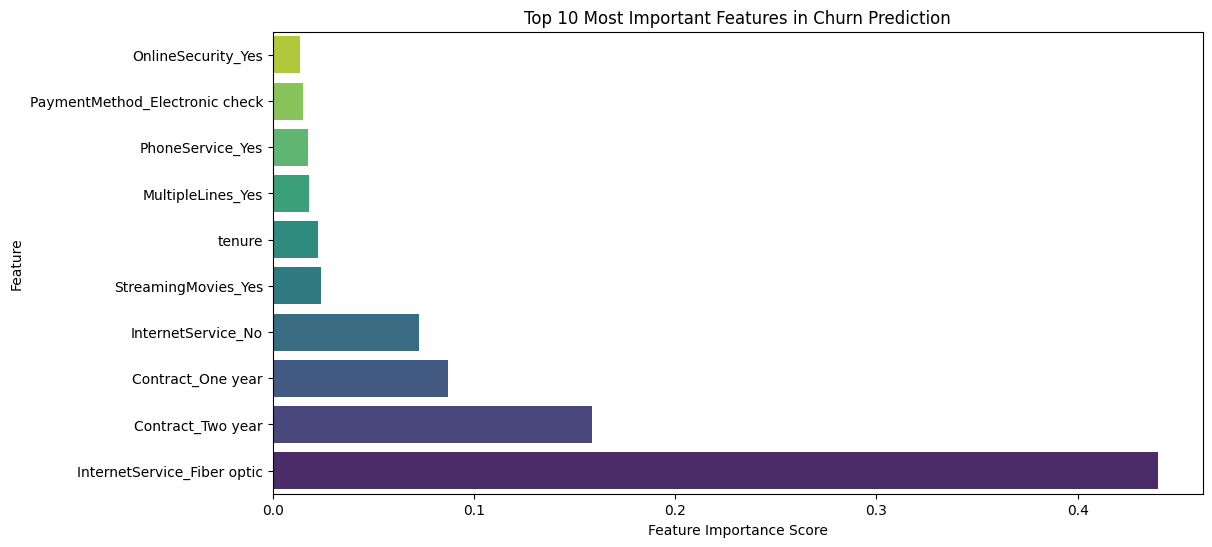

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance with updated seaborn syntax
plt.figure(figsize=(12, 6))
sns.barplot(
    x=importance_df['Importance'][:10], 
    y=importance_df['Feature'][:10], 
    hue=importance_df['Feature'][:10],  # Assign `hue` to the same as `y`
    dodge=False,  # Prevent multiple bars for the same feature
    legend=False,  # Disable legend
    palette='viridis'
)

plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features in Churn Prediction')
plt.gca().invert_yaxis()  # Invert so the most important feature is at the top
plt.show()


# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring='accuracy',
    cv=5,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\durue\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:37:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}


c:\Users\durue\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:37:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 Accuracy: 0.8020

🔍 Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87      1035
        True       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


🔍 Confusion Matrix:
 [[937  98]
 [181 193]]
